In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Reviews.csv')
df.shape

(568454, 10)

In [3]:
reviews = df[['Text', 'Summary']]

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 2 columns):
Text       568454 non-null object
Summary    568427 non-null object
dtypes: object(2)
memory usage: 8.7+ MB


In [5]:
for col in reviews.columns:
    print("Null entry in {} : {}".format(col, reviews[reviews[str(col)].isnull() == True].shape[0] != 0))

Null entry in Text : False
Null entry in Summary : True


In [6]:
df[df['Summary'].isnull() == True]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
33958,33959,B00412W76S,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
40548,40549,B00020HHRW,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
101106,101107,B0014B0HWK,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
102979,102980,B000FVDWU4,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
117515,117516,B0016B7Z32,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
155712,155713,B0009VO58S,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
178290,178291,B00073IVAQ,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
198474,198475,B000FVBYCW,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
212691,212692,B00020HHAO,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
237565,237566,B000ELGPAO,A15AMT9T9A1309,Film-Friend,1,1,3,1328572800,NaN,This is a cool system only problem is that the...


**observation**
1. We see the *summary* is also empty. So we will be removing those rows as these are not required much.

In [7]:
reviews = reviews[reviews['Text'].isnull() == False]

In [8]:
reviews[reviews['Text'].isnull() == True]

,Text,Summary


In [9]:
text = reviews['Text']
summ = reviews['Summary']

In [10]:
reviews.to_csv("text-summary.txt", sep="\t", index=False)

In [11]:
df = pd.read_csv('text-summary.txt', sep='\t')
df.head()

,Text,Summary
0,I have bought several of the Vitality canned d...,Good Quality Dog Food
1,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised
2,This is a confection that has been around a fe...,"""Delight"" says it all"
3,If you are looking for the secret ingredient i...,Cough Medicine
4,Great taffy at a great price. There was a wid...,Great taffy


In [12]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [34]:
SOS_token = 0
EOS_token = 1
OOV_token = 2

class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {"SOS": 0, "EOS": 1, "OOV": 2}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS", 2: "OOV"}
        self.n_words = 3  # Count SOS and EOS and OOV

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [14]:
# Lowercase, trim, and remove non-letter characters
def normalizeString(s):
    """All words are separated with spaces, remove digits, separeate punctuation with spaces"""
    s = s.lower().strip()
    s = re.sub(r"([.!?])", r" \1 ", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    
    return s

In [15]:
'''demo'''
normalizeString('1234.1234, He is very good boy. He always stay in home. Very friendly, humble and polite. Who are you? Hi!!. How you doing? I borrowed 200 rupess from him.')

' . he is very good boy . he always stay in home . very friendly humble and polite . who are you ? hi ! ! . how you doing ? i borrowed rupess from him . '

In [16]:
def readLangs(document, summary):
    print("Reading lines...")

    # Read the file and split into lines
    lines = open('%s-%s.txt' % (document, summary), encoding='utf-8').read().strip().split('\n')

    # Split every line into pairs and normalize
    pairs = [[normalizeString(s) for s in l.split('\t')] for l in lines]

    input_document = Lang(document)
    output_summary = Lang(summary)

    return input_document, output_summary, pairs

In [17]:
CONTRACTIONS = {"didn't":"did not", "mayn't":"may not", "can't":"can not", "won't":"will not", "isn't":"is not", \
                "amn't":"am not", "aren't":"are not", "wasn't":"was not", "weren't":"were not", "couldn't":"could not", \
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not",\
                "i'll":"i will", "you'll":"you will", "they'll":"they will",\
                "may've":"may have", "can've":"can have", "will've":"will have", "you've":"you have", \
                "could've":"could have", "would've":"would have", "you've":"you have", "they":"they have",\
                "i've":"i have", "you've":"you have", "we've":"we have", "there's":"there is", "i'm":"i am",\
                "it's":"it is", "what's":"what is", "where's":"where is", "how's":"how is", "i'd":"i had"}

In [18]:
MAX_LENGTH = 500
def filterPair(p):
    return len(p[0].split(' ')) < MAX_LENGTH and len(p[1].split(' ')) < MAX_LENGTH

def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]

In [19]:
def prepareData(text, summ, reverse=False):
    input_text, output_summ, pairs = readLangs(text, summ)
    print("Read %s sentence pairs" % len(pairs))
    pairs = filterPairs(pairs)
    print("Trimmed to %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_text.addSentence(pair[0])
        output_summ.addSentence(pair[1])
    print("Counted words:")
    print(input_text.name, input_text.n_words)
    print(output_summ.name, output_summ.n_words)
    return input_text, output_summ, pairs

In [20]:
input_text, output_summ, pairs = prepareData('text', 'summary', True)
print(random.choice(pairs))

Reading lines...
Read 568455 sentence pairs
Trimmed to 564958 sentence pairs
Counting words...
Counted words:
text 107364
summary 32598
['my two schnauzers absolutely love the apple chicken chews from br veggie life vitality . i was having a difficult time obtaining them br from our pet store so i ordered them from amazon . no after ordering br packages and trying to return them because they are defective br i am told they are non refundable . very unhappy . in to the br trash . dogswell veggie life vitality sweet potato chicken and and apple chicken chews . ', 'stale product']


## Building the Seq2Seq model

### The Encoder
    The encoder of a seq2seq network is a RNN that outputs some value for every word from the input sentence. 
    For every input word the encoder outputs a vector and a hidden state, and uses the hidden state for the next input word.

In [21]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()

        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size) # creates its own embedding matrix of dim(inp_feature x hid_feature)
        self.gru = nn.GRU(hidden_size, hidden_size)
    
    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1) # extracts positional embedding of the index of the word
        output, hidden = self.gru(embedded, hidden)  # forward pass of the gru
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

### The Decoder
    The decoder is another RNN that takes the encoder output vector(s) and outputs a sequence of words to create the translation.

In [22]:
"""===== only for demo purpose ====="""
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        output = F.relu(output)
        output, hidden = self.gru(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

### Attention Decoder
    If only the context vector is passed betweeen the encoder and decoder, that single vector carries the burden of encoding the entire sentence.

    Attention allows the decoder network to “focus” on a different part of the encoder’s outputs for every step of the decoder’s own outputs. First we calculate a set of attention weights. These will be multiplied by the encoder output vectors to create a weighted combination. The result (called attn_applied in the code) should contain information about that specific part of the input sequence, and thus help the decoder choose the right output words.
    
![attention_decoder](https://pytorch.org/tutorials/_images/attention-decoder-network.png)

In [23]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size) # building emb matrix for summary words
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1) # changes to 3d list
        embedded = self.dropout(embedded) # adds dropout layer

        attn_weights = F.softmax(self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0), encoder_outputs.unsqueeze(0)) # batch multiplication of attn_weights and encoder_output will produce the context vector

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.gru(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

## Training

### Preparing the training the Data
    To train, for each pair we will need an input tensor (indexes of the words in the input sentence) and target tensor (indexes of the words in the target sentence). While creating these vectors we will append the EOS token to both sequences.

In [129]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] if word in lang.word2index else lang.word2index["OOV"] for word in sentence.split(' ')] # positional encoding for word in sent


def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token) # marker for end of the sentences
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)


def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_text, pair[0])
    target_tensor = tensorFromSentence(output_summ, pair[1])
    return (input_tensor, target_tensor) # returns the 2 tensors text and summary appended with <EOS> @end

### Training the Model
    To train we run the input sentence through the encoder, and keep track of every output and the latest hidden state. Then the decoder is given the <SOS> token as its first input, and the last hidden state of the encoder as its first hidden state.

    “Teacher forcing” is the concept of using the real target outputs as each next input, instead of using the decoder’s guess as the next input. Using teacher forcing causes it to converge faster but when the trained network is exploited, it may exhibit instability.

    You can observe outputs of teacher-forced networks that read with coherent grammar but wander far from the correct translation - intuitively it has learned to represent the output grammar and can “pick up” the meaning once the teacher tells it the first few words, but it has not properly learned how to create the sentence from the translation in the first place.

    Because of the freedom PyTorch’s autograd gives us, we can randomly choose to use teacher forcing or not with a simple if statement. Turn teacher_forcing_ratio up to use more of it.

In [25]:
teacher_forcing_ratio = 0.5

def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()                                                               # max_length: max words in a sent

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0) # number of words in current sentence
    target_length = target_tensor.size(0) # number of words in the current summary sentence

    # encoder_output is used for storing the encoder hidden states(output of gru) of one sentence
    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden) # compute forward pass of GRU for one word in the current sentence
        encoder_outputs[ei] = encoder_output[0, 0] # extracts the 1-d output tensor from tensor of dim(1, 1, -1)

    decoder_input = torch.tensor([[SOS_token]], device=device) # first input to decoder is <sos> always

    decoder_hidden = encoder_hidden ## last ouput of the encoder feeded to the decoder first input

    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(decoder_input, decoder_hidden, encoder_outputs)
            loss += criterion(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di]  # Teacher forcing

    else:
        # Without teacher forcing: use its own predictions as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(decoder_input, decoder_hidden, encoder_outputs)
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach()  # detach from history as input

            loss += criterion(decoder_output, target_tensor[di])
            if decoder_input.item() == EOS_token:
                break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

In [26]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (~remaining time:%s)' % (asMinutes(s), asMinutes(rs))

### Plotting results

In [28]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)
    plt.show()

In [27]:
def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(random.choice(pairs)) for i in range(n_iters)] # tensors:dim(#words_in_sent x 1) of position(index of word in vocab) from the words in a sentences
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1): # random sampling with replacement of n_iters sent from corpus
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        loss = train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('Total time:%s (iter:%d, Total Progress:%d%%) loss:%.4f' % (timeSince(start, iter / n_iters), iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

3m 38s (- 542m 4s) (500 0%) 5.4525
7m 24s (- 548m 27s) (1000 1%) 5.1407
11m 22s (- 557m 25s) (1500 2%) 4.6573
15m 2s (- 549m 7s) (2000 2%) 4.7421
18m 41s (- 542m 14s) (2500 3%) 4.6819
22m 33s (- 541m 35s) (3000 4%) 4.7421
26m 36s (- 543m 24s) (3500 4%) 4.6997
30m 36s (- 543m 25s) (4000 5%) 4.5513
34m 26s (- 539m 34s) (4500 6%) 4.6894
38m 7s (- 533m 41s) (5000 6%) 4.5826
41m 58s (- 530m 20s) (5500 7%) 4.5608
45m 49s (- 526m 54s) (6000 8%) 4.4609
49m 49s (- 525m 7s) (6500 8%) 4.2642
53m 52s (- 523m 20s) (7000 9%) 4.6182
57m 48s (- 520m 20s) (7500 10%) 4.2886
61m 36s (- 516m 0s) (8000 10%) 4.3482
65m 21s (- 511m 17s) (8500 11%) 4.4045
69m 18s (- 508m 14s) (9000 12%) 4.3816
73m 31s (- 506m 59s) (9500 12%) 4.4184
77m 16s (- 502m 20s) (10000 13%) 4.4001
81m 7s (- 498m 19s) (10500 14%) 4.3393
85m 6s (- 495m 8s) (11000 14%) 4.3677
89m 5s (- 491m 58s) (11500 15%) 4.1786
92m 51s (- 487m 31s) (12000 16%) 4.2096
96m 35s (- 482m 56s) (12500 16%) 4.3330
100m 18s (- 478m 21s) (13000 17%) 4.3165
103m 

<Figure size 432x288 with 0 Axes>

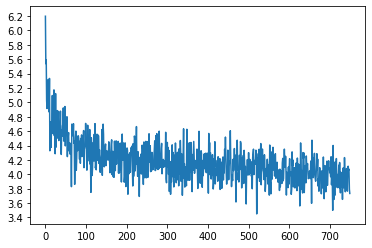

In [33]:
"""====== This cell initiates training ======"""
hidden_size = 256
encoder1 = EncoderRNN(input_text.n_words, hidden_size).to(device)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_summ.n_words, dropout_p=0.1).to(device)

trainIters(encoder1, attn_decoder1, 75000, print_every = 500)

**Observation**
1. Need more coputational power for higher epoch.
2. Higher epochs as loss is still decreasing.
2. loss: st: 5.4, end: 3.9

### Evaluation
    Evaluation is mostly the same as training, but there are no targets so we simply feed the decoder’s predictions back to itself for each step. Every time it predicts a word we add it to the output string, and if it predicts the EOS token we stop there. We also store the decoder’s attention outputs for display later.

In [29]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_text, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_summ.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]

In [30]:
def evaluateRandomly(encoder, decoder, n=10):
    for i in range(n):
        pair = random.choice(pairs)
        print('>', pair[0])
        print('=', pair[1])
        output_words, attentions = evaluate(encoder, decoder, pair[0])
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)
        print('')

In [36]:
evaluateRandomly(encoder1, attn_decoder1)

> this is a great organic cereal . i love that each individual flake comes from one wheat berry that is steamed then squished no overprocessed flakes mixed with sugar as mass market raisin bran cereals . this does mean that the erewhon flakes are small as a few reviewers already mentioned . i really like the texture of this cereal . it tastes great with a blend of vanilla soymilk and cow s milk to provide a bit of sweetness since the cereal itself does not contain sugar . i do let it sit after adding milk to soften a bit before eating . it could use a few more raisins but that is not a big enough deal to downgrade my rating . another consideration is that this is not a fortified enriched cereal so it is different from the typical cereals that provide a bunch of added vitamins . it does fill you up g fiber per serving and helps to reduce between meal junk food cravings . 
= great cereal
< great for the  <EOS>

> these chips have the right amount of crunch and i enjoy the taste . chips a

## Visualizing Attention

tata products are known for their quality . i have similar experience for toor dal . amazon offers great deal in its grocery . better to order from amazon as it is easy and cheap .
great for the price <EOS>


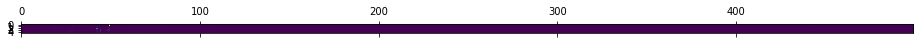

In [72]:
output_words, attentions = evaluate(encoder1, attn_decoder1, "tata products are known for their quality . i have similar experience for toor dal . amazon offers great deal in its grocery . better to order from amazon as it is easy and cheap .")
print("tata products are known for their quality . i have similar experience for toor dal . amazon offers great deal in its grocery . better to order from amazon as it is easy and cheap .")
print(' '.join(w for w in output_words))
plt.matshow(attentions.numpy())
plt.show()

input = tata products are known for their quality . i have similar experience for toor dal . amazon offers great deal in its grocery . better to order from amazon as it is easy and cheap .
output = great for the price <EOS>


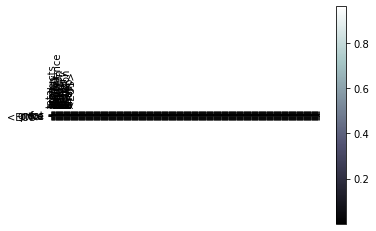

input = i have been buying online for some time now . nothing to beat the quality of tata . brands in big basket , grofers are all are several notches below tata and many times you find live flies in packaging date is fresh also . . .
output = great product <EOS>


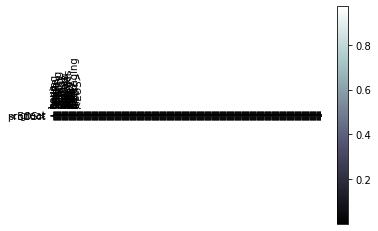

input = i love these k cups ! ! one of my favorites ! i am someone who likes very light coffee which ends up making the coffee cold very fast and with these you don t need to add anything so it s great ! !
output = great !  <EOS>


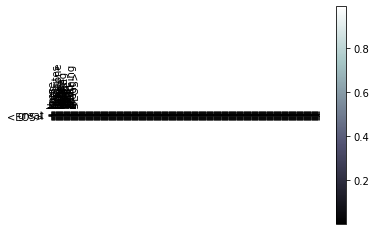

input = i m a big fan of chai and usually opt for the oregon or tazo variety . i saw this and had to try it as the convenience of a single serve chai made in seconds seemed to good to pass up . my expectations were pretty high as k cups are usually pretty delicious and the prices are steep . i sampled this one on the . oz . setting on my machine and it smelled wonderful as it brewed mixed . as it poured into the cup i took some time to read the ingredients . i noticed that this k cup is nothing more than and instant chai powder mix with powdered milk creamer and sugar . actually the first ingredient isn t even tea it s creamer . i didn t get too hung up on the details and tried the drink . it tasted ok until the end . the after taste was terrible and very unpleasant . it s hard to describe but i didn t like it . the overall taste of the drink was on the watery side and lacked the creaminess that i m used to with a good chai latte . it also had a very artificial flavor to it . i don t e

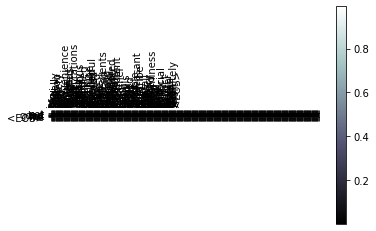

In [51]:
def showAttention(input_sentence, output_words, attentions):
    # Set up figure with colorbar
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(attentions.numpy(), cmap='bone')
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticklabels([''] + input_sentence.split(' ') + ['<EOS>'], rotation=90)
    ax.set_yticklabels([''] + output_words)

    # Show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def evaluateAndShowAttention(input_sentence):
    output_words, attentions = evaluate(
        encoder1, attn_decoder1, input_sentence)
    print('input =', input_sentence)
    print('output =', ' '.join(output_words))
    showAttention(input_sentence, output_words, attentions)

## +ve
## good quality
evaluateAndShowAttention("tata products are known for their quality . i have similar experience for toor dal . amazon offers great deal in its grocery . better to order from amazon as it is easy and cheap .")

## +ve
## Best quality and great taste .. authentic product
evaluateAndShowAttention("i have been buying online for some time now . nothing to beat the quality of tata . brands in big basket , grofers are all are several notches below tata and many times you find live flies in packaging date is fresh also . . .")

evaluateAndShowAttention("i love these k cups ! ! one of my favorites ! i am someone who likes very light coffee which ends up making the coffee cold very fast and with these you don t need to add anything so it s great ! !")

evaluateAndShowAttention(random.choice(pairs)[0])

In [91]:
import nltk

pair = pairs[1050]
print(pair[0], '\n')
hypothesis = pair[1]
reference, _ = evaluate(encoder1, attn_decoder1, pair[1])
print(hypothesis, '\n\n', reference)
#the maximum is bigram, so assign the weight into 2 half.
BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
print (BLEUscore)

this is the first time i ve used the coconut oil from manila coco factory and i was so pleased with the taste smell and overall incredible quality that i will buy more and recommend it to my family and friends . i am so glad i tried it . i have been using coconut oil for several years and it has changed my life and health . this oil ranks high in my book . also i liked ordering this product through amazon because they make it fast easy and painless . thank you for having this product on your site amazon .  

totally fantastic 

 ['great', '<EOS>']
0


In [128]:
from rouge import Rouge 
import random

sum_f, sum_p, sum_r = 0, 0, 0
samples = 1000
c = 0
for i in range(samples):
    text = random.choice(pairs)
    hypothesis = text[1]
    reference, _ = evaluate(encoder1, attn_decoder1, text[0])
    reference = ' '.join(w for w in reference)

#     print("<text>", text[0], '\n')
#     print("<summary>", hypothesis, '\n')
#     print("<m/c summary>", reference, '\n')

    rouge = Rouge()
    try:
        scores = rouge.get_scores(hypothesis, reference)
#         print ('Rouge-1 : ', scores[0]['rouge-1'])
#         print ('Rouge-2 : ', scores[0]['rouge-2'])
#         print ('Rouge-L : ', scores[0]['rouge-l'])

        sum_f += scores[0]['rouge-l']['f']
        sum_p += scores[0]['rouge-l']['p']
        sum_r += scores[0]['rouge-l']['r']
    except:
        c+=1
        pass

    if((i+1)%100 == 0):
        print(i+1, end=' ')
samples -= c
print()
print("f:{}, p:{}, r:{}".format(sum_f/samples, sum_p/samples, sum_r/samples))

100 200 300 400 500 600 700 800 900 1000 
f:0.10865687466580504, p:0.12792607392607402, r:0.12604756909756917


**Observation**
1. need more epoch for better results 
2. need copy and coverage for better results